# Diabetes Data Preparation
<!-- # In this dataset, we have lot of observations that have missing values
# Missing values are represented using 0s
# We need to impute values; one option is to find out mean for every class and use that as a substitute 
# for missing values
# With these changes,the model F1 score improves from 0.65 to 0.81
 -->

In [191]:
# In this dataset, we have lot of observations that have missing values
# We need to impute values (0's in this case) with the mean for every class

# With these changes,the model F1 score improves from 0.65 to 0.81


<!-- ### This dataset has a lot of observations that have missing values
### Missing values are represented using 0s
### We need to impute values; one option is to find out mean for every class and use that as a substitute 
### for missing values
### With these changes,the model F1 score improves from 0.65 to 0.81 -->

In [229]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# columns = ['diabetes','no_times_pregnant', 'glucose_concentration', 'blood_pressure',
#        'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes_pedigree',
#        'age']
columns = ['diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']

df = pd.read_csv('pima_indians_diabetes_all.csv')


In [231]:
# Dataset is completely numeric and this is an unbalanced dataset with way more non-diabetes vs diabetes, (as we hope it would be)
df.head(20)

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Check for correlations

In [232]:
df.corr()['diabetes_class'].sort_values(ascending = False)

diabetes_class                 1.000000
glucose_concentration          0.466581
bmi                            0.292695
age                            0.238356
preg_count                     0.221898
diabetes_pedi                  0.173844
two_hr_serum_insulin           0.130548
triceps_skin_fold_thickness    0.074752
diastolic_bp                   0.065068
Name: diabetes_class, dtype: float64

In [233]:
# Separate Diabetics from Non-Diabetics
diabetes = df['diabetes_class'] == 1
no_diabetes = df['diabetes_class'] == 0

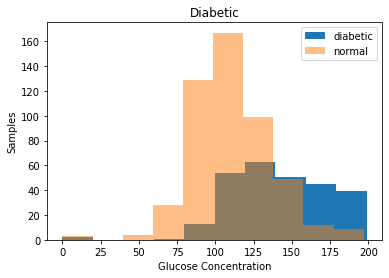

In [234]:
# Check to see the diferences between diabetics with glucose concentration and without

plt.hist(df[diabetes].glucose_concentration, label='diabetic')
plt.hist(df[no_diabetes].glucose_concentration,alpha=0.5,label='normal')
plt.title('Diabetic')
plt.xlabel('Glucose Concentration')
plt.ylabel('Samples')
plt.legend()

# Check missing values

In [235]:
df.isnull().sum()
# No observations have missing values, based on the head above, they appear to be filled in with 0

preg_count                     0
glucose_concentration          0
diastolic_bp                   0
triceps_skin_fold_thickness    0
two_hr_serum_insulin           0
bmi                            0
diabetes_pedi                  0
age                            0
diabetes_class                 0
dtype: int64

In [236]:
df.describe()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Groupby Class and Check for Summary Statistics for each group

In [237]:
group_class = df.groupby('diabetes_class')

group_class.mean()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
diabetes_class,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [238]:
# Check missing values before 
df.head(20)

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Fill in mean values for each group

In [239]:
# For each group, use group level averages to fill in the missing values

def average_by_group(df,group_class,cols):
    for col in cols:

        df[col] = group_class[col].transform(lambda x: x.replace(0,x.mean()))
    return df

        
# columns_no_target = columns[1:]
print(columns)

average_by_group(df,group_class,columns)

# Check missing values again after the transform
df.head(20)


['diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp', 'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi', 'diabetes_pedi', 'age']


,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6.000000,148.0,72.000000,35.000000,100.335821,33.600000,0.627,50,1
1,1.000000,85.0,66.000000,29.000000,68.792000,26.600000,0.351,31,0
2,8.000000,183.0,64.000000,22.164179,100.335821,23.300000,0.672,32,1
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,4.865672,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5.000000,116.0,74.000000,19.664000,68.792000,25.600000,0.201,30,0
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10.000000,115.0,68.184000,19.664000,68.792000,35.300000,0.134,29,0
8,2.000000,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8.000000,125.0,96.000000,22.164179,100.335821,35.142537,0.232,54,1


## Shuffle and split into Training and Validation Sets
The Target Variable should be first, followed by the rest of the features:

       

In [240]:
# Randomize the Dataset

np.random.seed(5)
l = list(df.index)

# Shuffle up the df using the index
np.random.shuffle(l)

df = df.iloc[l]

In [241]:
# Training will be 70%
# Validation will be 30%


row = df.shape[0]
train = int(row * .7)
test = row - train

In [242]:
row,train,test

(768, 537, 231)

In [243]:
# Save to CSV Files

# Training File
df[:train].to_csv("diabetes_train.csv",index = False,index_label = 'Row',header = False,columns = columns)


# Validation File
df[train:].to_csv("diabetes_validation.csv",index = False,index_label = 'Row',header = False,columns = columns)

pd.read_csv('diabetes_train.csv',names = columns)

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,6.000,92.0,62.0,32.000,126.000000,32.0,0.085,46
1,0,5.000,132.0,80.0,19.664,68.792000,26.8,0.186,69
2,0,3.000,106.0,72.0,19.664,68.792000,25.8,0.207,27
3,0,4.000,99.0,68.0,38.000,68.792000,32.8,0.145,33
4,0,4.000,96.0,56.0,17.000,49.000000,20.8,0.340,26
...,...,...,...,...,...,...,...,...,...
532,1,9.000,164.0,84.0,21.000,100.335821,30.8,0.831,32
533,0,3.298,93.0,60.0,25.000,92.000000,28.7,0.532,22
534,1,10.000,125.0,70.0,26.000,115.000000,31.1,0.205,41
535,0,3.298,67.0,76.0,19.664,68.792000,45.3,0.194,46


In [244]:
# Write the Columns to a list
with open('diabetes_train_column_list.txt','w') as f:
    f.write(','.join(columns))

In [245]:
columns

['diabetes_class',
 'preg_count',
 'glucose_concentration',
 'diastolic_bp',
 'triceps_skin_fold_thickness',
 'two_hr_serum_insulin',
 'bmi',
 'diabetes_pedi',
 'age']